کد اصلی برگرفته از گیت‌هاب زیر:

https://github.com/MarianaBazely


<a href="https://colab.research.google.com/github/mamintoosi/DM/code/KNN/KNN-mnist.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [13]:
# K-Nearest Neighbor Classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# load the MNIST digits dataset
mnist = datasets.load_digits()

#print (mnist.data)

# Training and testing split,
# 75% for training and 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25)#, random_state=42)

In [15]:
# Checking sizes of each data split
print("training data points: {}".format(len(y_train)))
print("testing data points: {}".format(len(y_test)))


training data points: 1347
testing data points: 450


In [16]:
mnist.data.shape

(1797, 64)

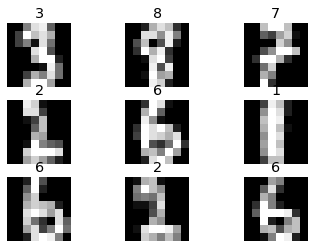

In [17]:
# visualize
plt.figure
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(8, 8), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    plt.savefig('mnist_plot.png')
plt.show()

In [18]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)


KNeighborsClassifier()

In [19]:
preds = knn_clf.predict(x_test)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.9866666666666667


In [20]:
preds.shape

(450,)

In [21]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(3, 20, 2)
accuracies = []

# take 10% of the training data and use that for validation
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.1)#, random_state=84)

# loop over kVals
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    # evaluate the model and print the accuracies list
    score = model.score(x_val, y_val)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))

k=3, accuracy=97.04%
k=5, accuracy=97.04%
k=7, accuracy=97.04%
k=9, accuracy=97.04%
k=11, accuracy=97.78%
k=13, accuracy=97.78%
k=15, accuracy=97.04%
k=17, accuracy=97.04%
k=19, accuracy=96.30%
k=11 achieved highest accuracy of 97.78% on validation data


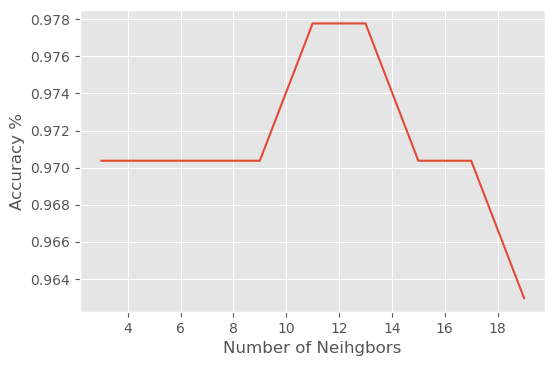

In [22]:
# num_k = np.arange(1, 21)
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.plot(kVals, accuracies)
plt.xlabel('Number of Neihgbors')
plt.ylabel('Accuracy %')
plt.savefig('acc_plot.png')

In [23]:
# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(x_train, y_train)

# Predict labels for the test set
predictions = model.predict(x_test)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))


EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.97        56
           2       0.97      1.00      0.98        31
           3       0.98      0.98      0.98        46
           4       1.00      0.96      0.98        48
           5       0.98      0.98      0.98        46
           6       0.98      1.00      0.99        43
           7       0.96      1.00      0.98        46
           8       1.00      0.88      0.93        48
           9       1.00      1.00      1.00        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



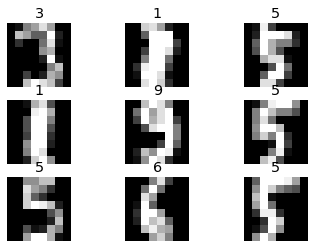

In [24]:
# visualize
plt.figure
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].reshape(8, 8), cmap='gray')
    plt.title(predictions[i])
    plt.axis('off')
    plt.savefig('mnist_plot.png')
plt.show()